    age  weight  height        BMI
0    22      44    5.10   8.627451
1    24      50    5.20   9.615385
2    26      55    5.30  10.377358
3    28      58    5.40  10.740741
4    30      60    5.50  10.909091
5    32      65    5.60  11.607143
6    34      68    5.70  11.929825
7    36      70    5.80  12.068966
8    38      73    5.90  12.372881
9    40      78    5.10  15.294118
10   42      80    5.11  15.655577
11   44      84    5.11  16.438356
12   46      86    6.00  14.333333
13   48      88    6.10  14.426230
14   50      90    6.10  14.754098
15   21      43    5.20   8.269231
16   23      48    5.30   9.056604
17   25      56    5.40  10.370370
18   26      59    5.50  10.727273
19   27      61    5.60  10.892857
20   28      66    5.70  11.578947
21   29      69    5.80  11.896552
22   31      71    5.90  12.033898
23   33      73    5.10  14.313725
24   35      77    5.11  15.068493
25   37      82    5.11  16.046967
26   38      83    6.00  13.833333
27   39      90    6

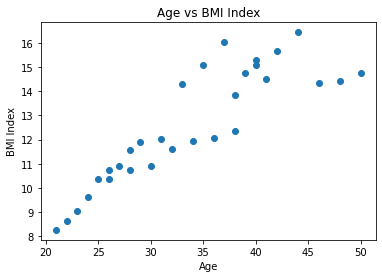

In [1]:
#question-1
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("studentdata.csv")
df["BMI"] = df["weight"]/df["height"]
df
print(df)

plt.scatter(df["age"],df["BMI"])
plt.xlabel("Age")
plt.ylabel("BMI Index")
plt.title("Age vs BMI Index")
plt.show()

In [2]:
#question-2
import pandas as pd
import numpy as np

stu_data = pd.read_csv("studentdata.csv")

weight=stu_data.weight
height=stu_data.height

poly1=np.polyfit(height,weight,deg=1)
poly2=np.polyfit(height,weight,deg=2)
poly3=np.polyfit(height,weight,deg=3)
poly4=np.polyfit(height,weight,deg=4)
poly5=np.polyfit(height,weight,deg=5)

pred_wght1=np.polyval(poly1,height)
pred_wght2=np.polyval(poly2,height) 
pred_wght3=np.polyval(poly3,height) 
pred_wght4=np.polyval(poly4,height) 
pred_wght5=np.polyval(poly5,height) 

r21=1-np.sum((weight-pred_wght1)**2)/np.sum((weight-np.mean(weight))**2)
r22=1-np.sum((weight-pred_wght2)**2)/np.sum((weight-np.mean(weight))**2)
r23=1-np.sum((weight-pred_wght3)**2)/np.sum((weight-np.mean(weight))**2)
r24=1-np.sum((weight-pred_wght4)**2)/np.sum((weight-np.mean(weight))**2)
r25=1-np.sum((weight-pred_wght5)**2)/np.sum((weight-np.mean(weight))**2)

print("r2 scores for all five models")
print(f'model1:r2={round(r21,2)}')
print(f'model2:r2={round(r22,2)}')
print(f'model3:r2={round(r23,2)}')
print(f'model4:r2={round(r24,2)}')
print(f'model5:r2={round(r25,2)}')
print("\n")
print("Best Model: model5")

r2 scores for all five models
model1:r2=0.29
model2:r2=0.61
model3:r2=0.68
model4:r2=0.71
model5:r2=0.75


Best Model: model5


R-Squared: 0.0


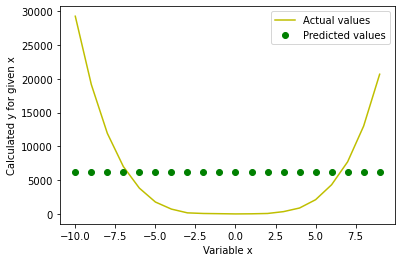

R-Squared: 0.043494295361541035


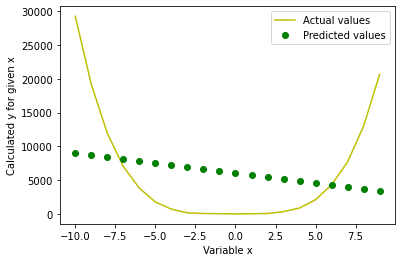

R-Squared: 0.920852578405097


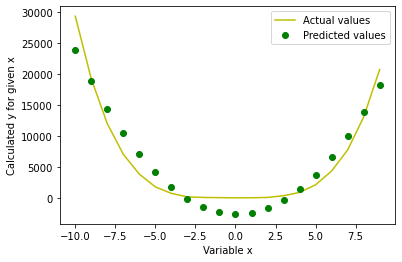

R-Squared: 0.9291567168405589


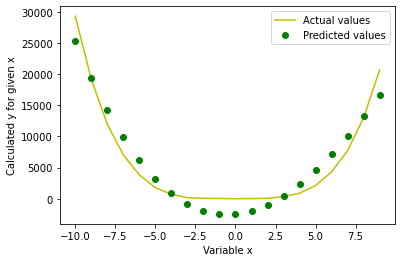

R-Squared: 0.9999851181993049


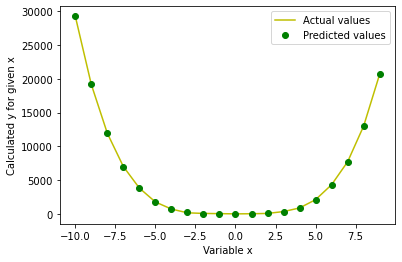

R-Squared: 0.9999853603570672


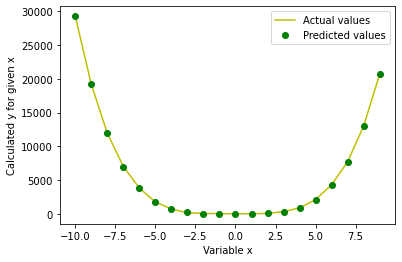

In [3]:
#question-3
import random
import matplotlib.pyplot as plt
import numpy as np


def rSqrd(actual, predicted):
    err_val = ((predicted - actual)**2).sum()
    mean_val = err_val/len(actual)
    return 1 - (mean_val/np.var(actual))


def generate_data(x_values):
    y_values= []
    for x in x_values:
        y_value= 3*x**4 + 1*x**3 + 3*x**2 + 4*x + 5
        y_values.append(y_value+ random.gauss(0, 35))
    return y_values


x_values = np.arange(-10, 10, 1)

y_values = generate_data(x_values)


for i in range (6):
    model= np.polyfit(x_values, y_values, i)
    est_y_values = np.polyval(model, x_values)
    print('R-Squared:', rSqrd(y_values, est_y_values))
    plt.plot(x_values, y_values, 'y', label = 'Actual values')
    plt.plot(x_values, est_y_values, 'go', label = 'Predicted values')
    plt.xlabel('Variable x')
    plt.ylabel('Calculated y for given x')
    plt.legend()
    plt.show()

T Score All: 1.9600739452380114
T Score Sample: 1.9600739452380114


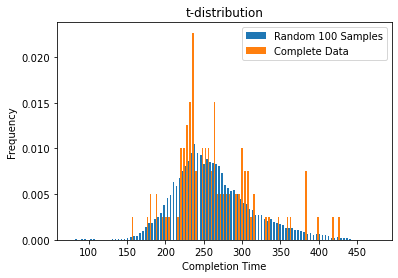

In [7]:
#question-4
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

df = pd.read_csv("bm_results2012.csv", encoding="unicode_escape")
df = df[df.official != '-']
df['comptime'] = pd.to_numeric(df['official'])
dataset = df['comptime']
new_dataset = list(dataset)
random_data = random.sample(new_dataset,100)

conf_Int = 0.95
alpha = 1-conf_Int

size_A = len(new_dataset)
size_S = len(random_data)

mean_all = np.mean(new_dataset)
mean_sample = np.mean (random_data)

std_all = np.std(new_dataset)
std_sample = np.std(random_data)

t_score_all = scipy.stats.t.isf(alpha/2, df=(size_A-1))
t_score_sample = scipy.stats.t.isf(alpha/2, df=(size_A-1))

print("T Score All:", t_score_all)
print("T Score Sample:", t_score_sample)

plt.hist([new_dataset,random_data],bins=100,rwidth=1.0, density=True, label=['Random 100 Samples','Complete Data'], )
plt.title('t-distribution')
plt.xlabel('Completion Time') 
plt.ylabel('Frequency') 
plt.legend()
plt.show()